<a href="https://colab.research.google.com/github/akshpatel26/Machine-Learning-Model/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
data = load_iris()
dir(data)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df["target"] = data.target
df["target_names"] =  df.target.apply(lambda x : data.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

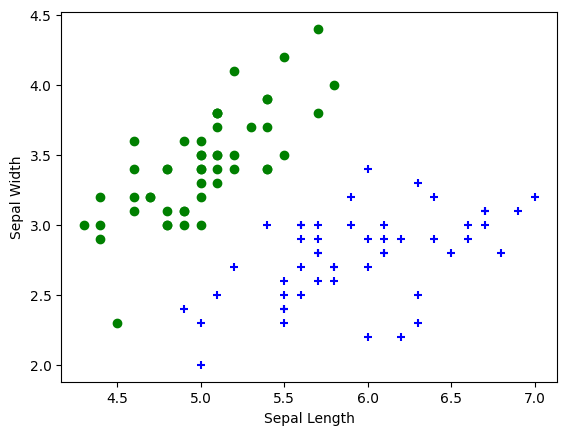

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='o')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='+')

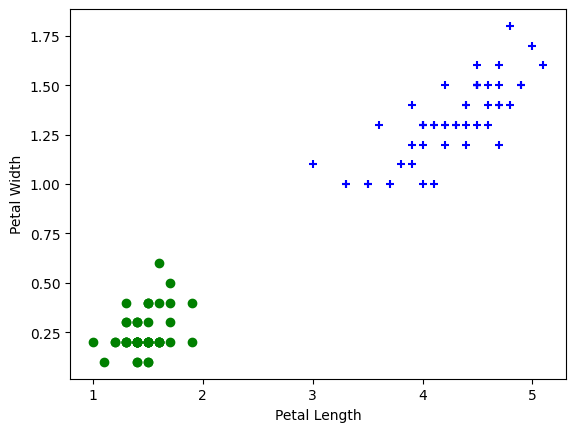

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='o')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='+')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(['target','target_names'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

120
30


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_test, y_test)


0.9666666666666667

In [ ]:
knn.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

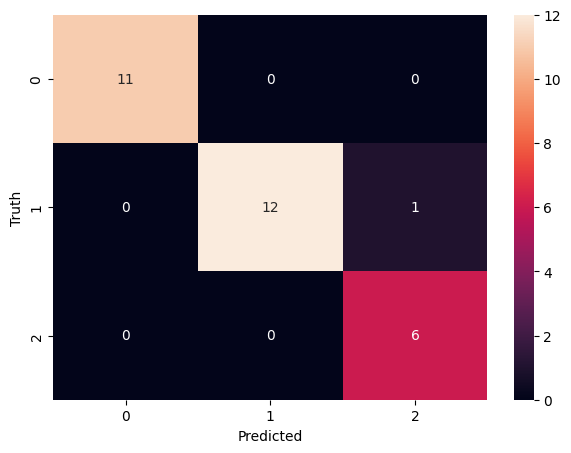

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
for i in [7,15,35,75,100]:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  print(knn.score(X_test, y_test))

0.9666666666666667
0.9666666666666667
0.9666666666666667
0.6666666666666666
0.5666666666666667
